# Exploration 과제 2-1. load_digits 데이터셋을 이용한 손글씨 분류 모델
본 과제는 MNIST 손글씨 이미지 데이터셋을 0에서 9까지 열 가지 카테고리로 분류하는 모델로써, 다섯 가지 모델 중에서 어느 모델을 사용하는 것이 가장 좋은지를 확인하는 작업이다.

In [2]:
# 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 데이터 준비
load_digits 메서드를 import하여 손글씨 데이터를 준비한다.

In [3]:
digits = load_digits() # digits 변수에 손글씨 데이터 저장
digits.keys() # 손글씨 데이터의 컬럼 정보 확인

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# 데이터의 구성 확인
digits_data = digits.data
digits_data.shape

(1797, 64)

총 1,797개의 데이터가 존재하며, 각 데이터는 64개의 숫자로 구성되었음을 알 수 있다.

In [4]:
# 첫 번째 데이터의 샘플 확인
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

64개의 숫자 형태로 이루어진 배열(array)이 출력되었으며, 이 숫자 배열은 8x8 크기의 이미지가 가지는 픽셀의 값을 일렬로 펴 놓은 것이다.

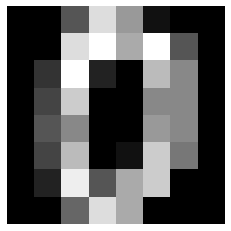

In [5]:
# 해당 데이터셋의 손글씨 이미지 확인
import matplotlib.pyplot as plt
%matplotlib inline # 이미지를 현재 화면에 표시

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
# 64개의 데이터를 8*8 크기로 reshape 필요
plt.axis('off')
plt.show()

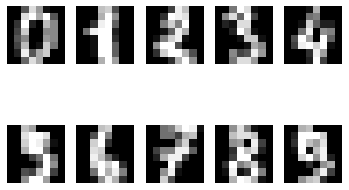

In [6]:
# 여러 개의 이미지를 한 번에 확인하기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
# 데이터셋의 target 데이터 구하기
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

각 이미지 데이터가 어떤 숫자를 나타내는지를 담고 있는지 확인할 수 있다.

## 학습 데이터와 테스트 데이터 세팅

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, # 모델이 글씨를 맞추기 위해 입력받는 특징
                                                    digits_label, # 모델이 맞추어야 하는 정답값
                                                    test_size=0.2, # 테스트 데이터셋의 크기 조절, 여기서는 전체의 20%를 테스트 데이터로 사용
                                                    random_state=7) # 학습 데이터와 테스트 데이터를 분리하는 데 적용되는 무작위성을 결정

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


In [11]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [12]:
X_test.shape, y_test.shape

((360, 64), (360,))

## Decision Tree를 통한 학습 및 예측

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [19]:
# 모델의 정확도 평가

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8555555555555555

360개의 데이터에 대한 예측 결과, 85%의 정확도를 보여주고 있다. 맞은 데이터의 개수는 360x0.85=306개이며, 틀린 데이터의 개수는 54개로 분류되었다.

## Random Forest를 통한 학습

In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9638888888888889

360개의 데이터에 대한 예측 결과, 97%의 정확도를 보여주고 있다. 맞은 데이터의 개수는 360x0.97=350개이며, 틀린 데이터의 개수는 10개로 분류되었다.

## SVM을 통한 학습

In [23]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9888888888888889

360개의 데이터에 대한 예측 결과, 99%의 정확도를 보여주고 있다. 맞은 데이터의 개수는 360x0.99=357개이며, 틀린 데이터의 개수는 3개로 분류되었다.

## SGD Classifier를 통한 학습

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.90      0.86      0.88        42
           2       0.97      0.97      0.97        40
           3       0.87      0.97      0.92        34
           4       0.95      1.00      0.97        37
           5       0.87      0.96      0.92        28
           6       1.00      0.93      0.96        28
           7       0.94      0.97      0.96        33
           8       0.97      0.81      0.89        43
           9       0.86      0.94      0.90        32

    accuracy                           0.93       360
   macro avg       0.93      0.94      0.93       360
weighted avg       0.94      0.93      0.93       360



In [26]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

360개의 데이터에 대한 예측 결과, 94%의 정확도를 보여주고 있다. 맞은 데이터의 개수는 360x0.94=339개이며, 틀린 데이터의 개수는 21개로 분류되었다.

## Logistic Regression를 통한 학습

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


숫자의 폭이 부족

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9527777777777777

360개의 데이터에 대한 예측 결과, 96%의 정확도를 보여주고 있다. 맞은 데이터의 개수는 360x0.96=346개이며, 틀린 데이터의 개수는 14개로 분류되었다.